In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from dataclasses import dataclass

In [2]:
# Collect data
freqs = [50, 100, 500, 1000]
node_cnts = [1, 2, 3, 4]
int_arrs = [[None for _ in node_cnts] for _ in freqs]
for (i, f) in enumerate(freqs):
  for (j, c) in enumerate(node_cnts):
    file_name = f'./logs/udp/{c}-{f}/1.csv'
    data = pd.read_csv(file_name)
    int_arrs[i][j] = data['delay'].to_numpy()

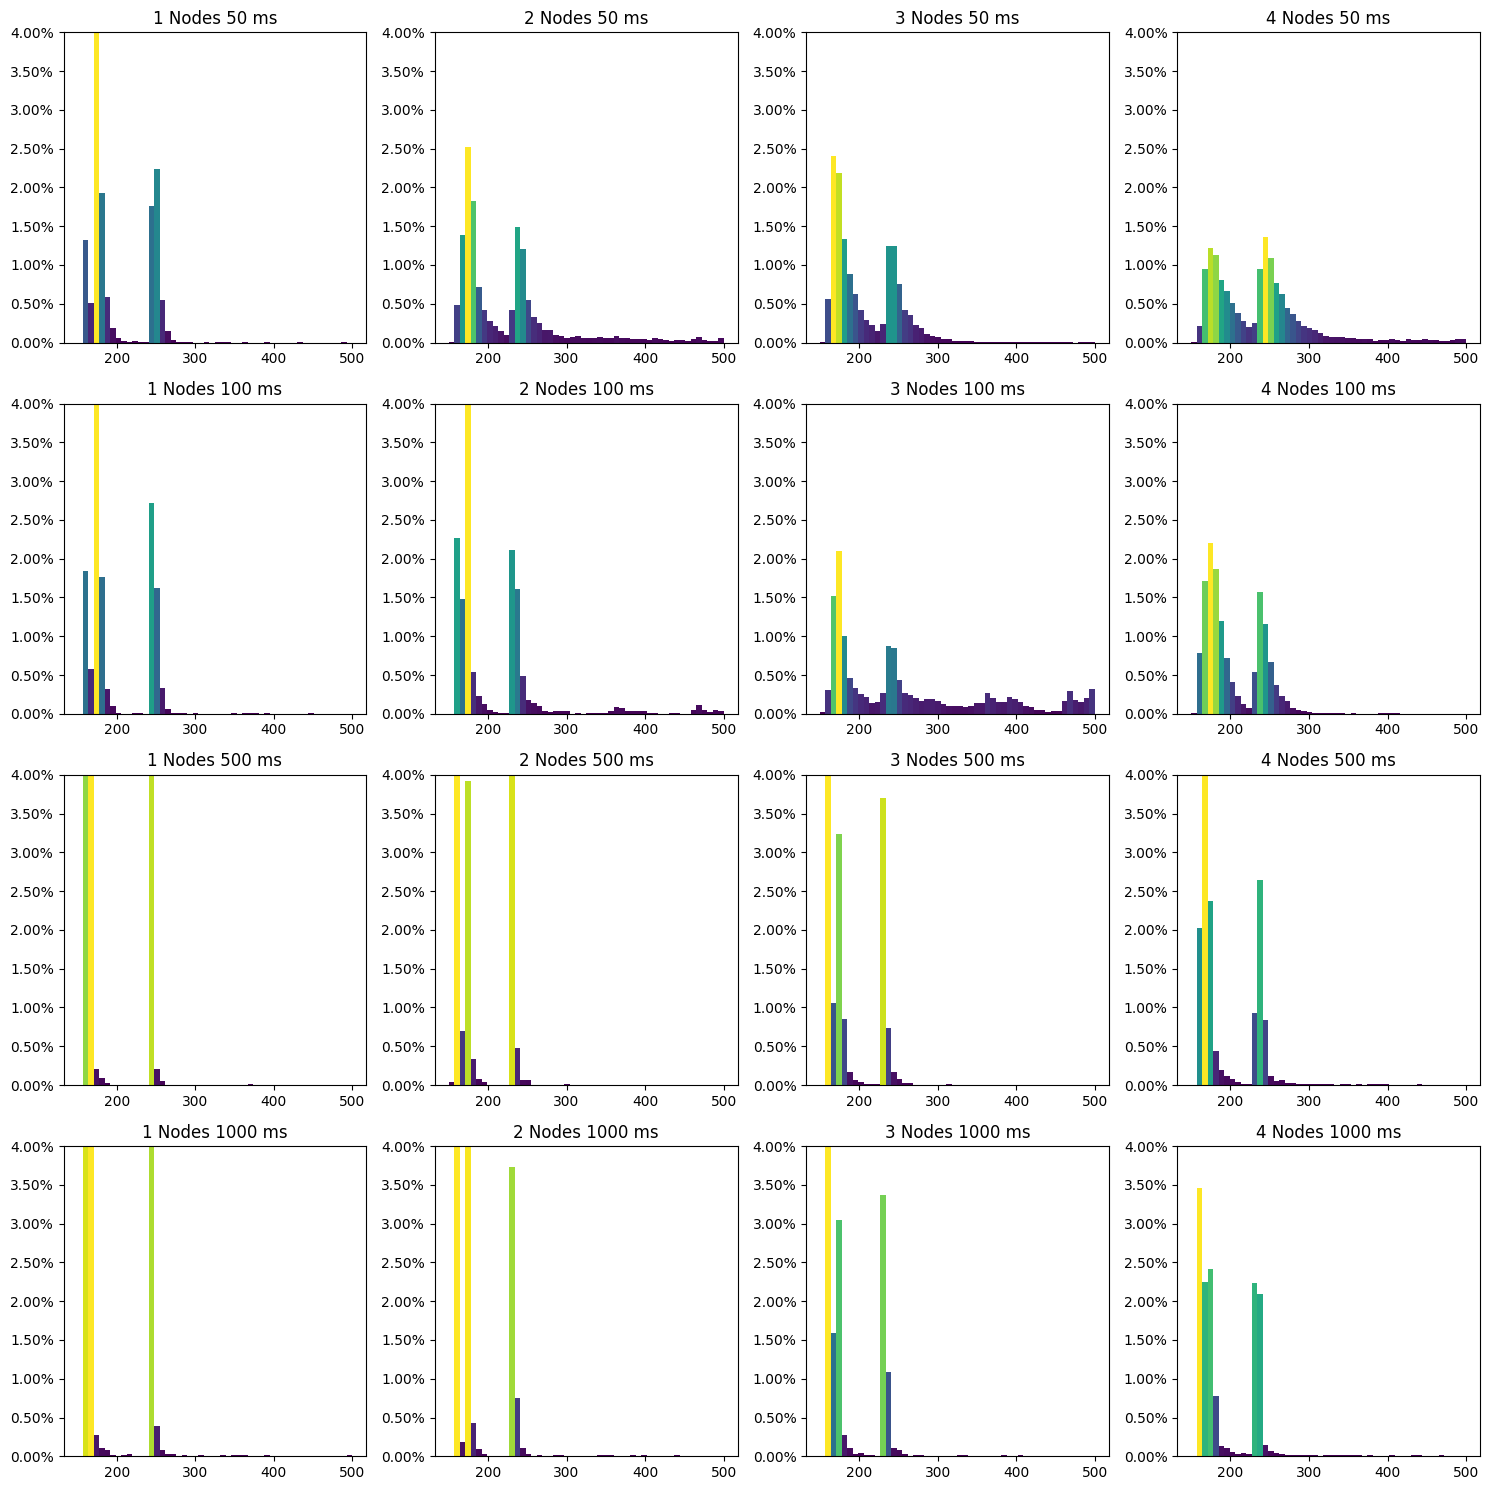

In [3]:

# Draw distribution figures
fig, axs = plt.subplots(len(freqs), len(node_cnts), tight_layout=True, figsize=(15, 15))
for (i, arr_per_freq) in enumerate(int_arrs):
  for (j, delays) in enumerate(arr_per_freq):
    ax = axs[i, j]
    ax.set_ylim(0, 0.04)
    N, bins, patches = ax.hist(delays, bins=50, range=(150, 500), density=True)
    ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
    ax.set_title(f'{node_cnts[j]} Nodes {freqs[i]} ms')
    fracs = N / N.max()
    norm = colors.Normalize(fracs.min(), fracs.max())
    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(norm(thisfrac))
        thispatch.set_facecolor(color)

In [4]:
def kick_outliners(data):
  mu = np.mean(data)
  sigma = np.std(data)
  return np.array([x for x in data if (mu - 3 * sigma < x < mu + 3 * sigma)], dtype=int)


filtered_data = [[kick_outliners(y) for y in x] for x in int_arrs]

means = [[np.mean(y) for y in x] for x in filtered_data]
np.array(means)

array([[ 200.15090795,  202.17837887,  172.83180305, 2027.6299508 ],
       [ 198.59505513,  178.4757367 ,  278.20737034,  166.20329301],
       [ 192.54997909,  163.60792399,  158.46963655,  158.01222985],
       [ 192.31772152,  166.29254268,  158.71152748,  158.60930154]])

In [5]:
medians = [[np.median(y) for y in x] for x in filtered_data]
np.array(medians)

array([[179., 184., 179., 867.],
       [177., 173., 238., 180.],
       [168., 172., 172., 169.],
       [168., 174., 170., 170.]])